Kiley Delaney/kileyfd2/675040797
CS 598 Advanced Bayesian Modeling Assignment 3

In [1]:
#!apt-get install -y jags

In [2]:
install.packages("rjags")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘coda’




In [3]:
library("rjags")

Loading required package: coda

Linked to JAGS 4.3.2

Loaded modules: basemod,bugs



# Problem 1

(a) R script FlintGibbs.R implements a Gibbs sampler for the partially conjugate
Flint data model. It is very similar to the example R code in Lesson 7.2: Gibbs
Sampling. Use the script to simulate from the posterior for µ and $σ^
2$. Then use R
function acf (with its default settings) to produce an autocorrelation plot for the
successive µ variates and an autocorrelation plot for the successive $σ^2$ variates.

In [4]:
### Gibbs sampler for (partially conjugate) analysis of Flint data

n <- 271
ybar <- 1.40
s.2 <- 1.684


mu0 <- 1.10
tau.2.0 <- sigma.2.0 <- 1.17
nu0 <- 1


mun <- function(sigma.2){
  (mu0/tau.2.0 + n*ybar/sigma.2) / (1/tau.2.0 + n/sigma.2)
}

tau.2.n <- function(sigma.2){
  1 / (1/tau.2.0 + n/sigma.2)
}

sigma.2.n <- function(mu){
  (nu0*sigma.2.0 + (n-1)*s.2 + n*(mu-ybar)^2) / (nu0 + n)
}

In [5]:
n.sim <- 10000
mu.sim <- numeric(n.sim)
sigma.2.sim <- numeric(n.sim)

mu.sim[1] <- 1.4         # starting value
sigma.2.sim[1] <- 1.7    # starting value

for(t in 2:n.sim){
  mu.sim[t] <- rnorm(1, mun(sigma.2.sim[t-1]),
                     sqrt(tau.2.n(sigma.2.sim[t-1])))

  sigma.2.sim[t] <- 1 / rgamma(1, (nu0+n)/2,
                               (nu0+n)*sigma.2.n(mu.sim[t])/2)
}

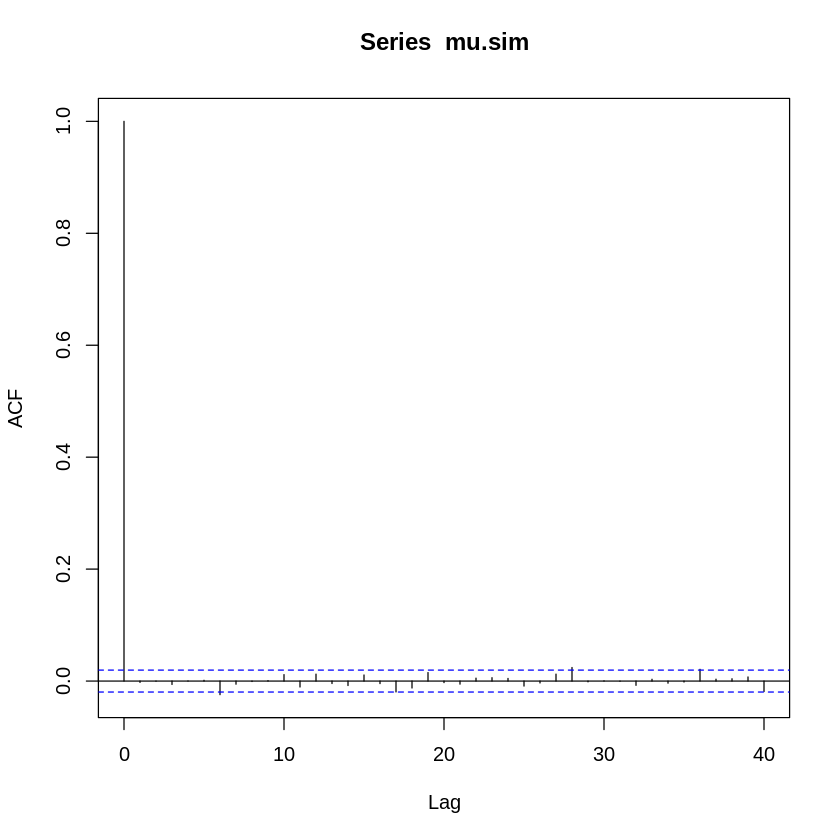

In [6]:
acf(mu.sim)

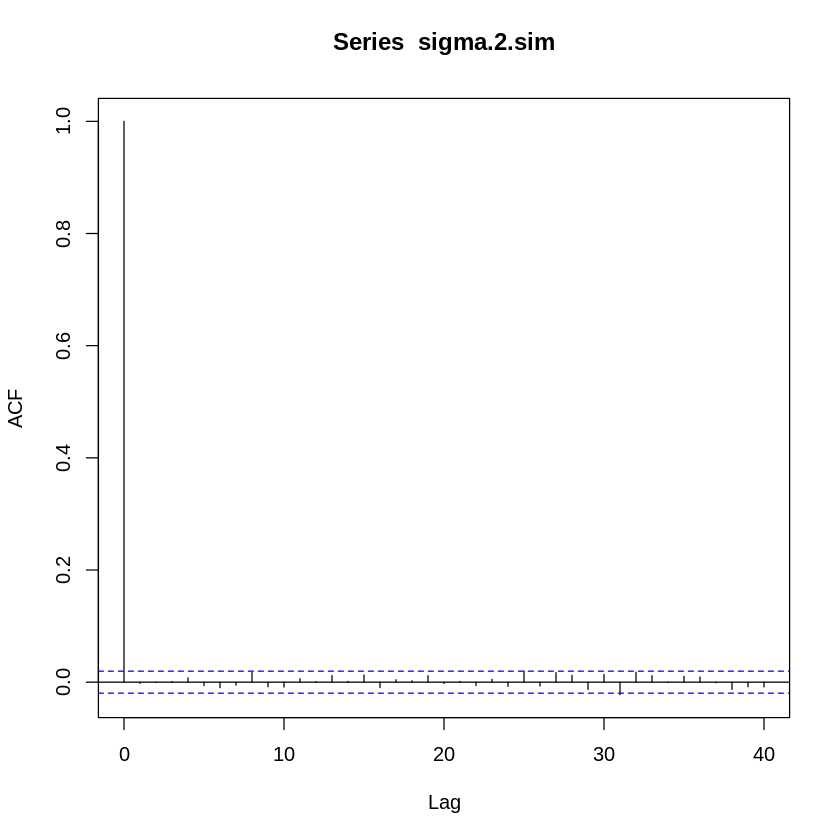

In [7]:
acf(sigma.2.sim)

(b) R script FlintMetropolis.R implements a Metropolis sampler for the same Flint data
model. It is very similar to the example R code in Lesson 7.3: Metropolis and
Metropolis-Hastings.


In [8]:
### Metropolis sampler for analysis of Flint data

n <- 271
ybar <- 1.40
s.2 <- 1.684


mu0 <- 1.10
tau.2.0 <- sigma.2.0 <- 1.17
nu0 <- 1


dinvchisq <- function(x, df, scalesq){  # inverse chi-square density
  if(x>0)
    ((df/2)^(df/2) / gamma(df/2)) * sqrt(scalesq)^df * x^(-(df/2+1)) *
      exp(-df*scalesq/(2*x))
  else 0
}

likelihood <- function(mu, sigma.2){
  sigma.2^(-n/2) * exp(-(n-1)*s.2/(2*sigma.2)) *
    exp(-n*(mu-ybar)^2/(2*sigma.2))
}

ratio <- function(mu.prop, sigma.2.prop, mu.old, sigma.2.old){
  dnorm(mu.prop,mu0,sqrt(tau.2.0)) * dinvchisq(sigma.2.prop,nu0,sigma.2.0) *
    likelihood(mu.prop,sigma.2.prop)  /
  (dnorm(mu.old,mu0,sqrt(tau.2.0)) * dinvchisq(sigma.2.old,nu0,sigma.2.0) *
    likelihood(mu.old,sigma.2.old))
}

In [9]:
n.sim <- 10000
mu.sim <- numeric(n.sim)
sigma.2.sim <- numeric(n.sim)
accept.prob <- numeric(n.sim-1)

rho <- 0.01

mu.sim[1] <- 1.4         # starting value
sigma.2.sim[1] <- 1.7    # starting value

for(t in 2:n.sim){
  mu.prop <- rnorm(1, mu.sim[t-1], sqrt(rho))
  sigma.2.prop <- rnorm(1, sigma.2.sim[t-1], sqrt(rho))

  accept.prob[t-1] <-
    min(ratio(mu.prop,sigma.2.prop,mu.sim[t-1],sigma.2.sim[t-1]), 1)
  if(runif(1) < accept.prob[t-1]){
    mu.sim[t] <- mu.prop
    sigma.2.sim[t] <- sigma.2.prop
  }else{
    mu.sim[t] <- mu.sim[t-1]
    sigma.2.sim[t] <- sigma.2.sim[t-1]
  }
}


# mean(accept.prob)




(i) Experiment with different settings for the proposal variance rho (by
uncommenting its line and changing the value). Find a value of rho that gives an
overall (average) acceptance rate of about 0.35. What value of rho did you find?

In [10]:
mu.sim

[1] 1.400000 1.499073 1.356267 1.356267 1.524689 1.524689 1.451963 1.396399
    [9] 1.392645 1.392645 1.397475 1.397475 1.397475 1.397475 1.397475 1.333871
   [17] 1.328237 1.328237 1.356149 1.297833 1.404812 1.404812 1.404812 1.404812
   [25] 1.441650 1.452743 1.356336 1.385246 1.474189 1.409154 1.409154 1.409154
   [33] 1.409154 1.409154 1.452598 1.452598 1.452598 1.452015 1.452015 1.509768
   [41] 1.480308 1.351638 1.416230 1.441454 1.416780 1.416780 1.416780 1.354246
   [49] 1.356796 1.406272 1.376888 1.376888 1.376888 1.322256 1.322256 1.448047
   [57] 1.441709 1.441709 1.448875 1.448875 1.381121 1.417553 1.417553 1.448175
   [65] 1.395157 1.395157 1.395157 1.395157 1.395157 1.395157 1.461667 1.461667
   [73] 1.416803 1.399101 1.371887 1.371887 1.371887 1.354926 1.354926 1.354926
   [81] 1.354926 1.414241 1.414241 1.453818 1.382741 1.382741 1.382741 1.382741
   [89] 1.453456 1.520252 1.464096 1.488508 1.513180 1.506072 1.450455 1.450455
   [97] 1.450455 1.450455 1.348316 1.335760 1.335760 1.400974 1.400974 1.400974
  [105] 1.360496 1.428413 1.397317 1.397317 1.397317 1.397317 1.556725 1.556725
  [113] 1.568166 1.531891 1.418528 1.418528 1.358326 1.358326 1.358326 1.256213
  [121] 1.256213 1.269546 1.265569 1.376229 1.376229 1.376229 1.376229 1.448172
  [129] 1.448172 1.448172 1.454985 1.454985 1.454985 1.454985 1.478973 1.465261
  [137] 1.341321 1.369593 1.369593 1.485472 1.485472 1.485472 1.530482 1.440933
  [145] 1.457620 1.457620 1.471074 1.339037 1.339037 1.339037 1.328119 1.323213
  [153] 1.434467 1.434467 1.479646 1.425981 1.370608 1.370608 1.370608 1.370608
  [161] 1.370608 1.370608 1.370608 1.294145 1.334915 1.334915 1.445733 1.445733
  [169] 1.445733 1.341425 1.341425 1.420951 1.420951 1.385312 1.473943 1.473943
  [177] 1.265376 1.306245 1.306002 1.307898 1.307898 1.307898 1.307898 1.243649
  [185] 1.361470 1.361470 1.423743 1.423743 1.550585 1.446370 1.446370 1.625888
  [193] 1.625888 1.594336 1.594336 1.594336 1.602939 1.412094 1.412094 1.415308
  [201] 1.472337 1.510209 1.510209 1.546534 1.546534 1.501848 1.501848 1.483986
  [209] 1.427957 1.427957 1.427957 1.555665 1.555665 1.555665 1.555665 1.555665
  [217] 1.447708 1.447708 1.447708 1.492437 1.434257 1.434257 1.373535 1.311444
  [225] 1.388848 1.388848 1.388848 1.460256 1.389283 1.401910 1.402036 1.305185
  [233] 1.418137 1.418137 1.475004 1.435983 1.365932 1.365932 1.365932 1.365932
  [241] 1.365932 1.419400 1.414825 1.438140 1.553634 1.428554 1.347915 1.347915
  [249] 1.377981 1.513681 1.513681 1.427166 1.427166 1.335045 1.335045 1.335045
  [257] 1.373986 1.420986 1.420986 1.374374 1.374374 1.324986 1.362830 1.362830
  [265] 1.362830 1.362830 1.362830 1.407052 1.476010 1.525362 1.525362 1.525362
  [273] 1.525362 1.525362 1.525362 1.525362 1.458283 1.279829 1.279829 1.354164
  [281] 1.398196 1.391044 1.419838 1.330701 1.332183 1.399614 1.399614 1.399614
  [289] 1.399614 1.330821 1.330821 1.371080 1.371080 1.583407 1.583407 1.590668
  [297] 1.590668 1.590668 1.453653 1.400912 1.400912 1.400912 1.304561 1.304561
  [305] 1.377732 1.377732 1.377732 1.472812 1.561884 1.491432 1.454701 1.491824
  [313] 1.491824 1.491824 1.489620 1.489620 1.470081 1.336822 1.336822 1.412557
  [321] 1.477663 1.477663 1.406222 1.406222 1.359755 1.321201 1.321201 1.321201
  [329] 1.321201 1.321201 1.398498 1.398498 1.441900 1.441900 1.456965 1.456965
  [337] 1.505031 1.505031 1.486601 1.486601 1.536191 1.499174 1.499174 1.452624
  [345] 1.505616 1.505616 1.434238 1.424577 1.424577 1.386007 1.386007 1.383056
  [353] 1.420346 1.374576 1.424175 1.306635 1.349412 1.400423 1.494088 1.335679
  [361] 1.452117 1.419172 1.339879 1.348776 1.357807 1.329810 1.461202 1.461202
  [369] 1.461202 1.438647 1.329257 1.511485 1.511485 1.493817 1.493817 1.457985
  [377] 1.433706 1.347259 1.280557 1.280557 1.280557 1.279429 1.363626 1.363626
  [385] 1.407252 1.407252 1.399051 1.470133 1.432537 1.461393 1.461393 1.356571
  [393] 1.356571 1.449044 1.357242 1.373602 1.420083 1.420083 1.383905 1.383905
  [4

(ii) With the value of rho that you found, use the script to simulate from the
posterior for µ and $σ^2$. Then use R function acf to produce an autocorrelation
plot for the successive µ variates and an autocorrelation plot for the successive $σ^2$ variates.

(c) Compare the autocorrelation plots from the previous two parts. Which method
exhibited faster mixing: the Gibbs sampler or the Metropolis sampler?


# Problem 2

 Use the 2016 US presidential polls data in polls2016.txt to answer the following, running
all parts using JAGS and R (rjags). Remember that you will have to create a variable
sigma in R to represent the standard deviation of the polls, defined to be half of the margin
of error. Refer to Lesson 4.2: Normal Hierarchical Model in R/JAGS.

(a) Use the model in polls20161.bug for the following:

In [13]:
polls_data <- read.table("polls2016.txt", header=TRUE)

In [14]:
polls_data$sigma <- (polls_data$ME) / 2

(i) Create an initialization list (in R) supporting 4 chains, with a different
initialization for each chain. Set initial values for mu to ±100 and values for tau to
100 or 0.01. Then use jags.model to create the JAGS model R object with these
initializations. List all of the R code you used.


In [15]:
initial_values <- list(list(mu=100, tau=100),
                      list(mu=100,  tau=0.01),
                      list(mu=-100, tau=100),
                      list(mu=-100,  tau=0.01))

In [16]:

# contents of polls20161_mod.bug
"
model {

  for (j in 1:length(y)) {
    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)
    theta[j] ~ dnorm(mu, 1/tau^2)
  }

  mu ~ dunif(-1000,1000)
  tau ~ dunif(0,1000)

}
"

[1] "\nmodel {\n\n  for (j in 1:length(y)) {\n    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)\n    theta[j] ~ dnorm(mu, 1/tau^2)\n  }\n\n  mu ~ dunif(-1000,1000)\n  tau ~ dunif(0,1000)\n\n}\n"

In [17]:
model1 <- jags.model("polls20161_mod.bug", polls_data, initial_values, n.chains = 4)

Warning message in jags.model("polls20161_mod.bug", polls_data, initial_values, :
“Unused variable "poll" in data”
Warning message in jags.model("polls20161_mod.bug", polls_data, initial_values, :
“Unused variable "ME" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 7
   Unobserved stochastic nodes: 9
   Total graph size: 42

Initializing model



(ii) Perform a burn-in of 2500 iterations, then monitor the mu and tau nodes
for 5000 iterations (for each chain). List all of the R code you used.

In [18]:
update(model1, 2500)

In [19]:
mon <- coda.samples(model1, c("mu","tau"), n.iter=5000)

(iii)  For the iterations you monitored, produce trace plots of mu and tau. Do
there appear to be any convergence problems? Display the plots and the R code
that produced them.

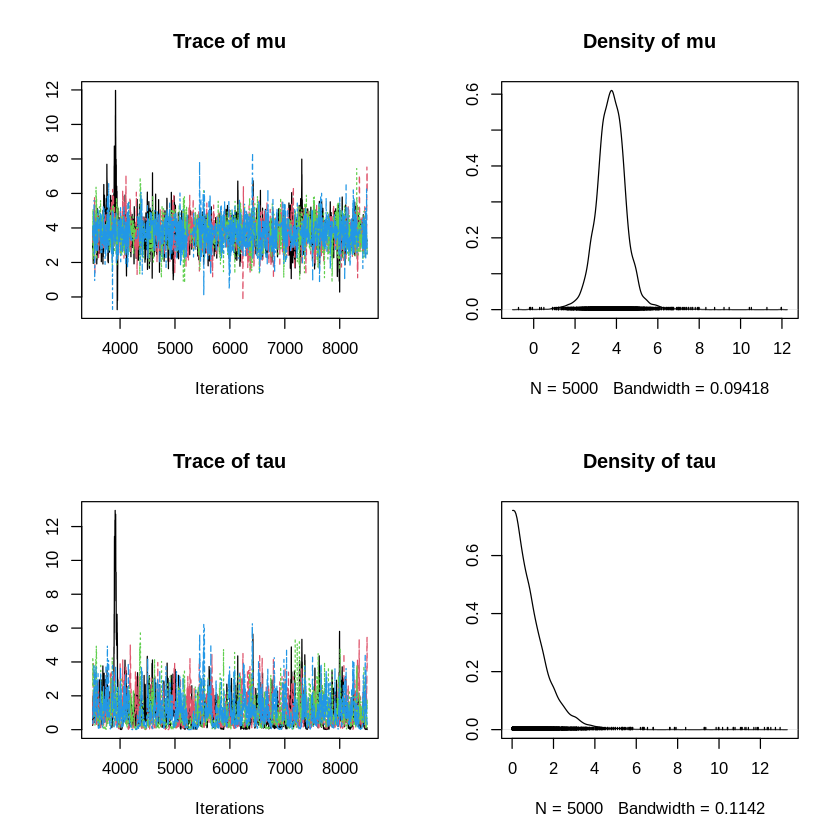

In [20]:
plot(mon, smooth=FALSE)

Based on the plots above, there do not appear to be any convergence issues.

(iv) For the iterations you monitored, compute Gelman-Rubin statistics
(potential scale reduction factors) for mu and tau. Do there appear to be any
convergence problems? Show your R code and its output.


Potential scale reduction factors:

    Point est. Upper C.I.
mu        1.01       1.01
tau       1.02       1.03

Multivariate psrf

1

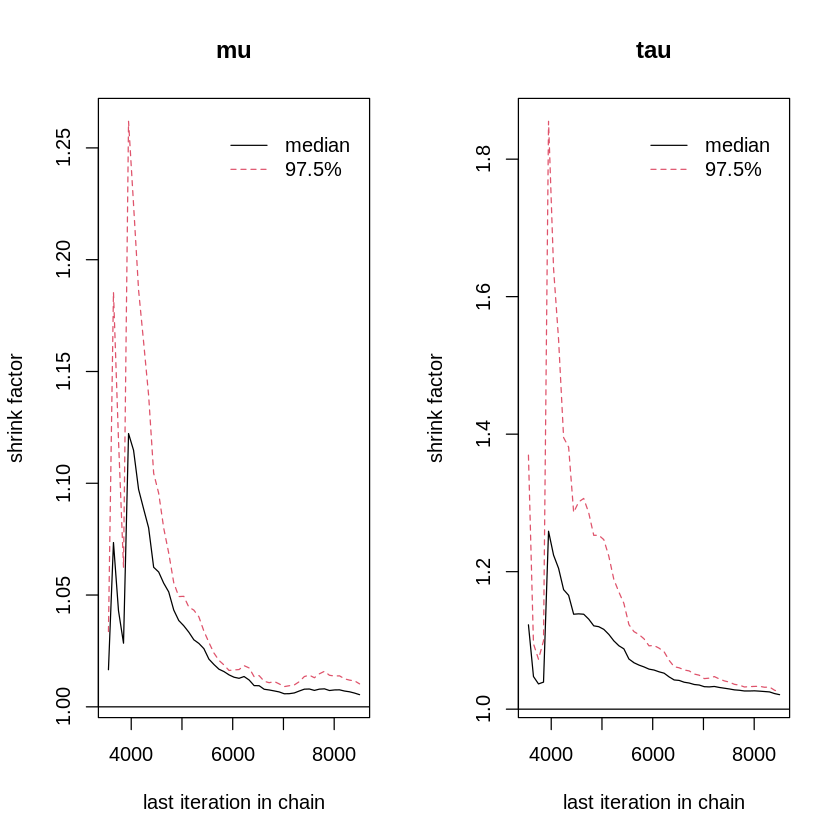

In [21]:
gelman.diag(mon, autoburnin=FALSE)
gelman.plot(mon, autoburnin=FALSE)

Based on the results from the above R code, there do not appear to be any convergence problems as the Gelman-Rubin statistics are very close to 1.

(v) For the iterations you monitored, display autocorrelation plots for mu and
tau for one of the chains. (Hint: For example, to reference the first chain of an
mcmc.list object named x, use x[[1]].) Comment on the apparent speed of
mixing.


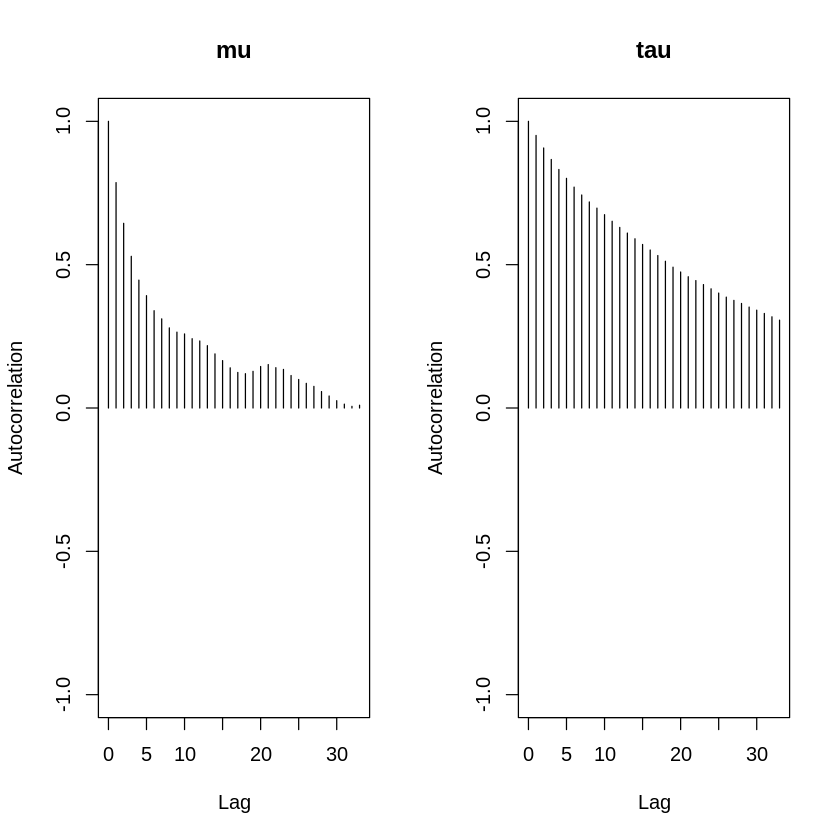

In [22]:
autocorr.plot(mon[[1]])

The apparent speed of mixing based on these plots seems to be slow.

(vi) For the iterations you monitored, compute effective sample sizes (for all
chains combined) for mu and tau. Would they be considered adequate? Show your
R code and its output.


In [23]:
effectiveSize(mon)

mu      tau 
1880.502  783.379

Both values exceed the suggested minimum value of 400, so they would be considered adequate.

(b) Now consider a new model that uses an almost flat prior for tau on the log scale, as
follows: Create a new JAGS model by modifying polls20161.bug to eliminate the
current prior for tau, create a new parameter logtau with a U(−100, 100) prior
distribution, and define tau to be equal to exp(logtau).

(i) Display all of the code for your new JAGS model.

In [24]:
# contents of polls20161_mod_v2.bug
"
model {

  for (j in 1:length(y)) {
    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)
    theta[j] ~ dnorm(mu, 1/tau^2)
  }

  mu ~ dunif(-1000,1000)
  logtau ~ dunif(−100, 100)
  tau <- exp(logtau)

}
"

[1] "\nmodel {\n\n  for (j in 1:length(y)) {\n    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)\n    theta[j] ~ dnorm(mu, 1/tau^2)\n  }\n\n  mu ~ dunif(-1000,1000)\n  logtau ~ dunif(−100, 100)\n  tau <- exp(logtau)\n\n}\n"

(ii) Create an initialization list (in R) supporting 4 chains, with a different
initialization for each chain. Set initial values for mu to ±100 and values for
logtau to log 100 or log 0.01. Then use jags.model to create the JAGS model R
object with these initializations. List all of the R code you used.


In [25]:
new_initial_values <- list(list(mu=100, logtau=log(100)),
                      list(mu=100,  logtau=log(0.01)),
                      list(mu=-100, logtau=log(100)),
                      list(mu=-100,  logtau=log(0.01)))

In [26]:
model2 <- jags.model("polls20161_mod_v2.bug", polls_data, new_initial_values, n.chains = 4)

Warning message in jags.model("polls20161_mod_v2.bug", polls_data, new_initial_values, :
“Unused variable "poll" in data”
Warning message in jags.model("polls20161_mod_v2.bug", polls_data, new_initial_values, :
“Unused variable "ME" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 7
   Unobserved stochastic nodes: 9
   Total graph size: 44

Initializing model



(iii) Perform a burn-in of 2500 iterations, then monitor the mu and tau nodes
for 5000 iterations (for each chain). List all of the R code you used.


In [27]:
update(model2, 2500)

In [28]:
mon2 <- coda.samples(model2, c("mu","tau"), n.iter=5000)

(iv) For the iterations you monitored, produce trace plots of mu and tau. Do
there appear to be any convergence problems? Display the plots and the R code
that produced them.

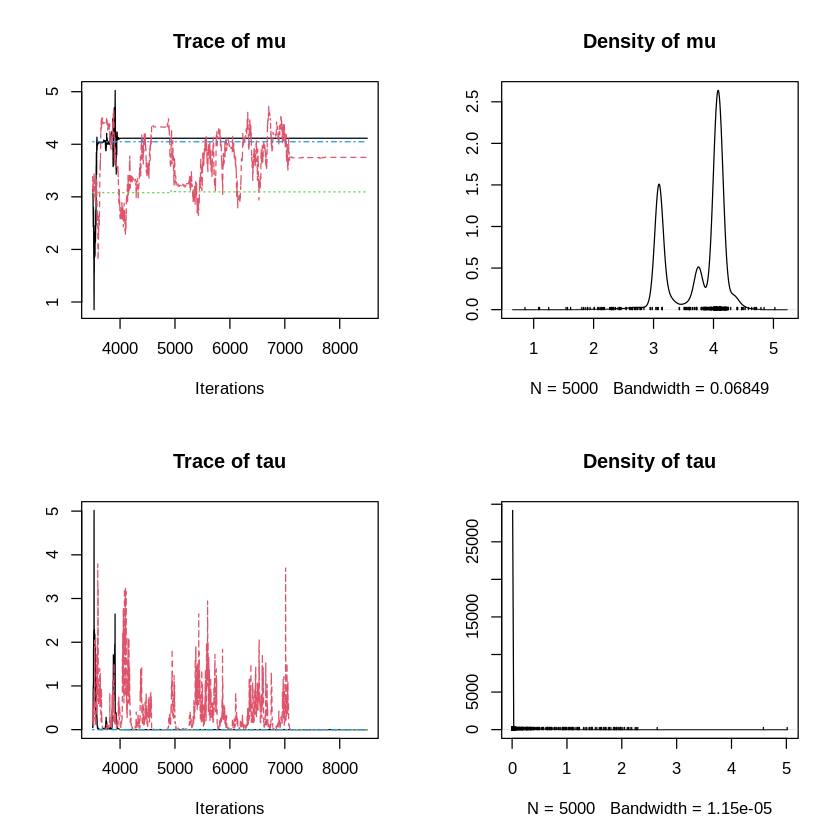

In [29]:
plot(mon2, smooth = FALSE)

The trace plot of tau (above) shows that this model did not achieve convergence.

(v) For the iterations you monitored, compute Gelman-Rubin statistics
(potential scale reduction factors) for mu and tau. Do there appear to be any
convergence problems? Show your R code and its output.

Potential scale reduction factors:

    Point est. Upper C.I.
mu        2.69       8.62
tau       1.37       2.64

Multivariate psrf

2.76

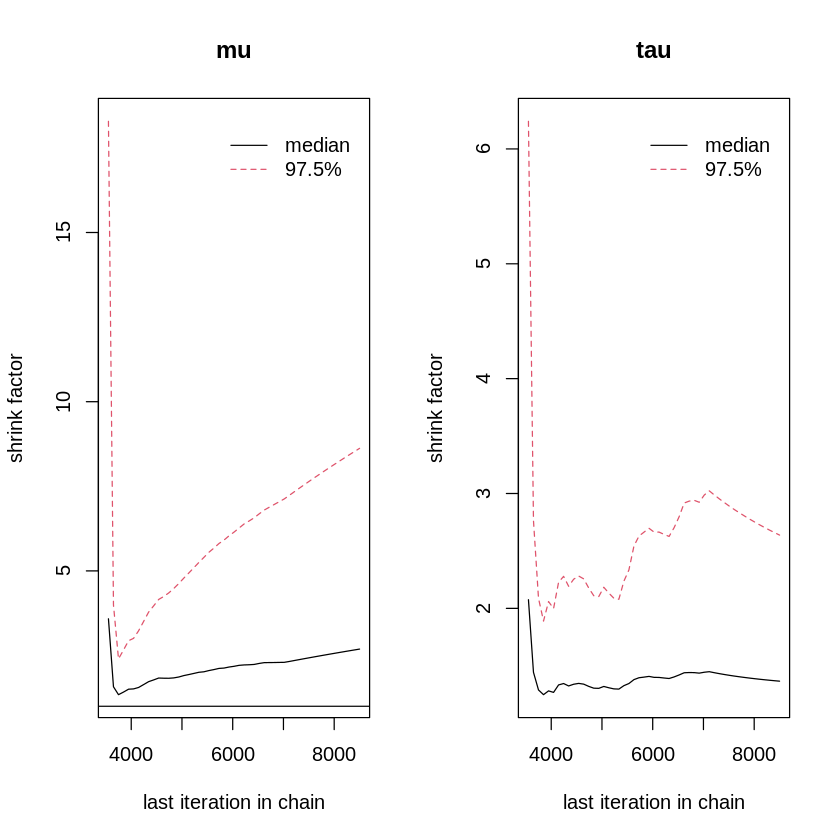

In [30]:
gelman.diag(mon2, autoburnin=FALSE)
gelman.plot(mon2, autoburnin=FALSE)

Both mu and tau did not reach convergence by the end of the iterations for this model.

(vi)  For the iterations you monitored, display autocorrelation plots for mu and
tau for one of the chains. Comment on the apparent speed of mixing.


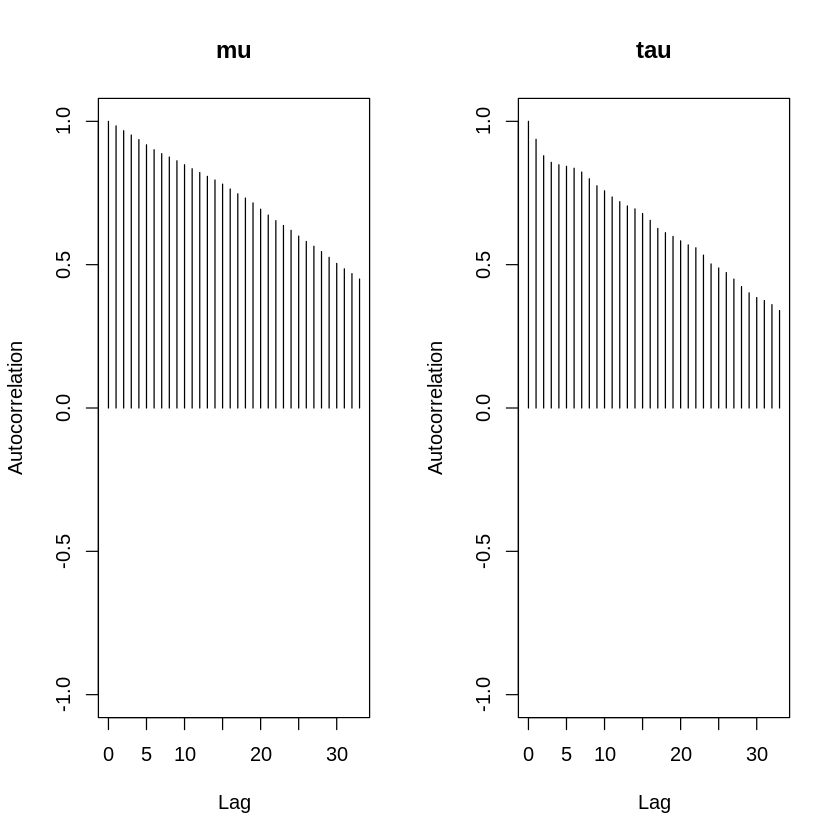

In [31]:
autocorr.plot(mon2[[1]])

These plots show that both mu and tau have high autocorrelations but slow mixing.

(vii)  What is wrong with this model that could explain any problems you
noted? (Hint: What would happen if you used an improper flat prior on log τ?)


The chosen hyperprior tau was close to flat but not quite (because that would give an improper posterior). A different hyperprior would need to be chosen in order for this model to work.